In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
## label 개수 확인
print(np.unique(y_train, return_counts = True)) 
print(np.unique(y_test, return_counts = True)) 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([ 980, 1135, 1032, 1010,  982,  892,  958, 1028,  974, 1009]))


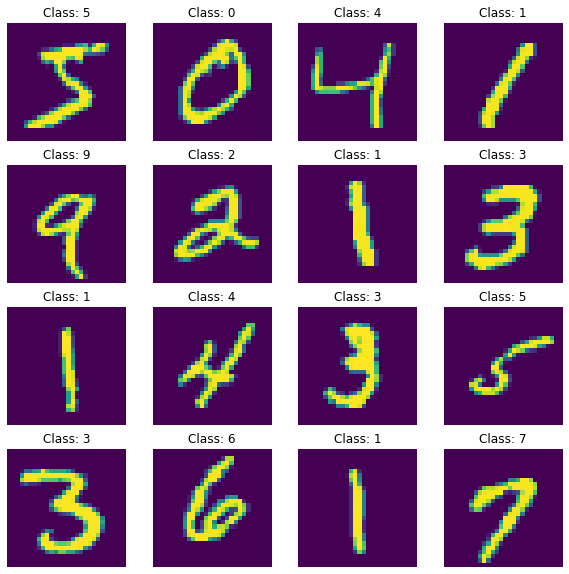

In [4]:
### 데이터 확인
class_names = ["0","1","2","3","4","5","6","7","8","9"]
plt.figure(figsize=(10, 10))
images, labels = X_train[:16], y_train[:16].flatten()
for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(images[i])
    plt.title(f"Class: {class_names[labels[i]]}")
    plt.axis("off")

### Overfitting 방지

- 데이터 관점 : 정규화
- 모델 관점 : dropout

In [5]:
### 전처리



In [6]:
### 모델 정의
class MLP(tf.keras.Model):
    def __init__(self):
        super(MLP, self).__init__()
        self.flatten = tf.keras.layers.Flatten(input_shape=(28, 28))
        self.dense = tf.keras.layers.Dense(256, activation='relu')
        self.out = tf.keras.layers.Dense(10, activation='softmax')        
        #Dropout
        #self.dropout1 = tf.keras.layers.Dropout(self.drop_rate)

    def call(self, x):
        x = self.flatten(x)
        x = self.dense(x)        
        return self.out(x)

In [7]:
### 모델 및 파라미터 할당
model = MLP()
learning_rate = 1e-4
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.SGD(lr=learning_rate)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [8]:
### 모델 동작 확인
model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])
model.build(input_shape=(1, 28, 28, 1))
model.summary()

Model: "mlp"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           multiple                  0         
                                                                 
 dense (Dense)               multiple                  200960    
                                                                 
 dense_1 (Dense)             multiple                  2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [9]:
### 모델 훈련
with tf.device("/device:GPU:0"):
    hist = model.fit(X_train, y_train, epochs=10, batch_size=32,
                    validation_data=(X_test, y_test))

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1875/1875 [==============================] - 12s 4ms/step - loss: 5.9012 - accuracy: 0.8518 - val_loss: 2.3625 - val_accuracy: 0.9120
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.8756 - accuracy: 0.9184 - val_loss: 1.7150 - val_accuracy: 0.9193
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.2067 - accuracy: 0.9355 - val_loss: 1.3849 - val_accuracy: 0.9308
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8606 - accuracy: 0.9460 - val_loss: 1.2242 - val_accuracy: 0.9343
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6628 - accuracy: 0.9529 - val_loss: 1.0898 - val_accuracy: 0.9392
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5205 - accuracy: 0.9594 - val_loss: 1.0652 - val_accuracy: 0.9407
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4209 - accuracy: 0.9632 - val_loss: 0.9847 - val_accuracy: 0.9432
Ep

In [10]:
### 평가
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.8825 - accuracy: 0.9456


[0.8825376033782959, 0.9455999732017517]

In [11]:
### 예측
y_prob = model.predict(X_test)
y_pred = np.argmax(y_prob, axis=1)

In [12]:
### 예측 리포트
from sklearn.metrics import classification_report, confusion_matrix
print('\n Classification report \n\n',
  classification_report(
      y_test,
      y_pred,
       target_names=class_names
      )
  )


 Classification report 

               precision    recall  f1-score   support

           0       0.97      0.98      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.93      0.94      0.94      1032
           3       0.92      0.94      0.93      1010
           4       0.95      0.94      0.94       982
           5       0.93      0.93      0.93       892
           6       0.96      0.95      0.95       958
           7       0.94      0.95      0.95      1028
           8       0.93      0.91      0.92       974
           9       0.93      0.92      0.93      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.94      0.94     10000
weighted avg       0.95      0.95      0.95     10000



(<matplotlib.legend.Legend at 0x7f30f010f550>, None)

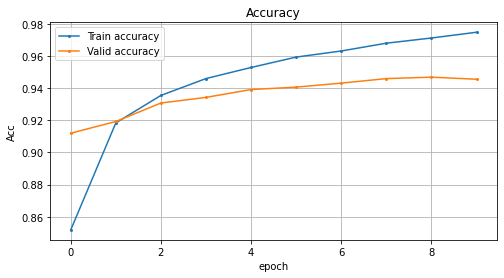

In [13]:
plt.figure(figsize = (8,4))
plt.plot(hist.history['accuracy'],marker = 'o', ms = 2, label = "Train accuracy")
plt.plot(hist.history['val_accuracy'],marker = 'o', ms = 2, label = "Valid accuracy")
plt.title(f'Accuracy');
plt.ylabel('Acc');
plt.xlabel('epoch')
plt.legend(), plt.grid()

(<matplotlib.legend.Legend at 0x7f306e6f47d0>, None)

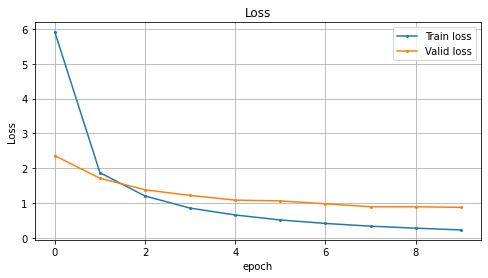

In [14]:
plt.figure(figsize = (8,4))
plt.plot(hist.history['loss'],marker = 'o', ms = 2, label = "Train loss")
plt.plot(hist.history['val_loss'],marker = 'o', ms = 2, label = "Valid loss")
plt.title(f'Loss');
plt.ylabel('Loss');
plt.xlabel('epoch')
plt.legend(), plt.grid()